# Voorspellend

# 1. Importeren en exploreren

In [1]:
# Importeren van de benodigde libraries
%config IPCompleter.greedy = True  
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

from seaborn import countplot
from matplotlib.pyplot import figure, show

In [2]:
# Opzetten van de connectie naar de SQL-database
host = "mysql.nm-interactive.net"
port = 3306
user = "windesheim"
password = "pMjq357Kdee7Sx8C"
database = "windesheim"
client = "mysql"

# Installeer eerst Mysqlcient in Anaconda Navigator
engine = create_engine("{0}://{1}:{2}@{3}:{4}/{5}".format(client, user, password, host, port, database))

# Aanmaken van de benodigde dataframes en uitvoeren de SQL-queries
datasource = pd.read_sql_query("SELECT * FROM source WHERE KWALIFICATIENIVEAU = 4",engine)
wervingsgebieden = pd.read_sql_query("SELECT * FROM wervingsgebieden",engine)
datasource.info()
wervingsgebieden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169415 entries, 0 to 169414
Data columns (total 14 columns):
nr                    169415 non-null int64
PC4_LEERL             169415 non-null int64
KWALIFICATIENIVEAU    169415 non-null int64
KWALIFICATIE CODE     169415 non-null int64
KWALIFICATIE NAAM     169415 non-null object
MBO SECTOR            169415 non-null object
DOMEIN                169415 non-null object
SECTORUNIT SBB        169415 non-null object
GESLACHT              169415 non-null object
2013   AANT           169415 non-null int64
2014   AANT           169415 non-null int64
2015   AANT           169415 non-null int64
2016   AANT           169415 non-null int64
2017   AANT           169415 non-null int64
dtypes: int64(9), object(5)
memory usage: 18.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
index            44 non-null int64
PostcodeStart    44 non-null int64
PostcodeEind     44 non-null int64
Gemeente  

In [3]:
# Laat n records zien van de datasource
datasource.head()

,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,1,0,0,0,0
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,1,0,0,0,0
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,0,0,0,2,0
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,1,0,0,0,0
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,1,0,0,0


In [4]:
datasource.dtypes

nr                     int64
PC4_LEERL              int64
KWALIFICATIENIVEAU     int64
KWALIFICATIE CODE      int64
KWALIFICATIE NAAM     object
MBO SECTOR            object
DOMEIN                object
SECTORUNIT SBB        object
GESLACHT              object
2013   AANT            int64
2014   AANT            int64
2015   AANT            int64
2016   AANT            int64
2017   AANT            int64
dtype: object

In [5]:
# Laat n records zien van de ingevoerde wervingsgebieden
wervingsgebieden.head()

,index,PostcodeStart,PostcodeEind,Gemeente,Locatie,Categorie
0,0,7940,7999,Meppel,Zwolle,Thuismarkt
1,1,8000,8069,Zwolle,Zwolle,Thuismarkt
2,2,8070,8099,Nunspeet,Zwolle,Thuismarkt
3,3,8100,8159,Raalte,Zwolle,Thuismarkt
4,4,8160,8199,Epe,Zwolle,Thuismarkt


In [6]:
wervingsgebieden.dtypes

index             int64
PostcodeStart     int64
PostcodeEind      int64
Gemeente         object
Locatie          object
Categorie        object
dtype: object

In [7]:
# Tijdelijke dataframe - 1000 rows - om te kunnen gebruiken voor testdoeleinden ivm tijdsbesparing
ds = datasource.sample(n=1000)

In [8]:
# Functie voor het controleren van de locatie en Categorie
def check_locatie(PostCode):
    test = wervingsgebieden.loc[(wervingsgebieden.PostcodeStart <= PostCode) & (wervingsgebieden.PostcodeEind >= PostCode), ['Locatie']]

    if test.empty:
        return ''
    else:
        return test['Locatie'].iloc[0]

# copy-paste voor de categorie
def check_categorie(PostCode):
    test = wervingsgebieden.loc[(wervingsgebieden.PostcodeStart <= PostCode) & (wervingsgebieden.PostcodeEind >= PostCode), ['Categorie']]

    if test.empty:
        return ''
    elif test.Categorie.count() > 1:
        return 'Meerdere'
    else:
        return test['Categorie'].iloc[0]

# Toevoegen van kolommen Locatie en Categorie aan het dataframe datasource    
datasource["Locatie"] = datasource["PC4_LEERL"].apply(check_locatie)
datasource["Categorie"] = datasource["PC4_LEERL"].apply(check_categorie)

In [9]:
# Welke soorten zitten er in kolom Locatie?
datasource.Locatie.unique()

array(['Flevoland', '', 'Zwolle'], dtype=object)

In [10]:
# Welke soorten zitten in kolom Categorie?
datasource.Categorie.unique()

array(['Aangrenzend Primair', '', 'Thuismarkt', 'Meerdere',
       'Aangrenzend Secundair'], dtype=object)

In [11]:
# Controleren of de kolommen Locatie en Categorie zijn toegevoegd aan datasource
datasource.head()

,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT,Locatie,Categorie
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,1,0,0,0,0,Flevoland,Aangrenzend Primair
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,1,0,0,0,0,Flevoland,Aangrenzend Primair
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,0,0,0,2,0,Flevoland,Aangrenzend Primair
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,1,0,0,0,0,Flevoland,Aangrenzend Primair
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,1,0,0,0,Flevoland,Aangrenzend Primair


# 2. Data-Melter (DB/SvdB)

Een punt van aandacht is het feit dat de data niet (mooi) allemaal in gelijke kolommen zitten. Zo zijn bijvoorbeeld de jaargegevens over diverse kolommen verdeeld. Om hiermee goed te kunnen werken (rekenen), dient deze data onder elkaar te worden gezet.

In [12]:
# Originele dataset behouden, in kopie werken:
dsc = datasource.copy()

In [13]:
dsc.head()

,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,2013 AANT,2014 AANT,2015 AANT,2016 AANT,2017 AANT,Locatie,Categorie
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,1,0,0,0,0,Flevoland,Aangrenzend Primair
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,1,0,0,0,0,Flevoland,Aangrenzend Primair
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,0,0,0,2,0,Flevoland,Aangrenzend Primair
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,1,0,0,0,0,Flevoland,Aangrenzend Primair
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,1,0,0,0,Flevoland,Aangrenzend Primair


In [14]:
# Verkrijg alle 'Jaartal' kolommen (de kolommen die ge-melt dienen te worden)
jaarCols = [col for col in dsc.columns if 'AANT' in col]
jaarCols

['2013   AANT', '2014   AANT', '2015   AANT', '2016   AANT', '2017   AANT']

In [15]:
# Wat zijn dan de id vars? (kolommen die gelijk moeten blijven)
otherCols = [col for col in dsc.columns if not 'AANT' in col]
otherCols

['nr',
 'PC4_LEERL',
 'KWALIFICATIENIVEAU',
 'KWALIFICATIE CODE',
 'KWALIFICATIE NAAM',
 'MBO SECTOR',
 'DOMEIN',
 'SECTORUNIT SBB',
 'GESLACHT',
 'Locatie',
 'Categorie']

In [16]:
# Verander de jaartalkolomnamen naar pure jaartallen (gebruik alleen eerste 4 karakters van kolomnaam)
jaarCleanCols = [str(x)[:4] for x in jaarCols]
jaarCleanCols

['2013', '2014', '2015', '2016', '2017']

In [17]:
# Maak een dictionary voor de rename functie
jaarDict = dict(zip(jaarCols, jaarCleanCols))
jaarDict

{'2013   AANT': '2013',
 '2014   AANT': '2014',
 '2015   AANT': '2015',
 '2016   AANT': '2016',
 '2017   AANT': '2017'}

In [18]:
# Rename de betreffende colommen
dsc = dsc.rename(columns=jaarDict)

In [19]:
# Controleren of de kolommen met jaartallen juist zijn hernoemd
print(dsc.shape)
dsc.head()

(169415, 16)


,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,2013,2014,2015,2016,2017,Locatie,Categorie
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,1,0,0,0,0,Flevoland,Aangrenzend Primair
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,1,0,0,0,0,Flevoland,Aangrenzend Primair
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,0,0,0,2,0,Flevoland,Aangrenzend Primair
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,1,0,0,0,0,Flevoland,Aangrenzend Primair
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,0,1,0,0,0,Flevoland,Aangrenzend Primair


In [20]:
# Voer de melt uit
dscMelt = pd.melt(dsc, id_vars=otherCols, var_name="Jaar", value_name="Aantal")

In [21]:
# Controleren of de melt met Jaar en Aantal goed zijn doorgevoerd
print(dscMelt.shape)
dscMelt.head()

(847075, 13)


,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,Locatie,Categorie,Jaar,Aantal
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,Flevoland,Aangrenzend Primair,2013,1
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,Flevoland,Aangrenzend Primair,2013,1
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,Flevoland,Aangrenzend Primair,2013,0
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,Flevoland,Aangrenzend Primair,2013,1
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,Flevoland,Aangrenzend Primair,2013,0


In [22]:
dscMelt['Jaar'].unique()

array(['2013', '2014', '2015', '2016', '2017'], dtype=object)

In [23]:
# (BK)
dscMelt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847075 entries, 0 to 847074
Data columns (total 13 columns):
nr                    847075 non-null int64
PC4_LEERL             847075 non-null int64
KWALIFICATIENIVEAU    847075 non-null int64
KWALIFICATIE CODE     847075 non-null int64
KWALIFICATIE NAAM     847075 non-null object
MBO SECTOR            847075 non-null object
DOMEIN                847075 non-null object
SECTORUNIT SBB        847075 non-null object
GESLACHT              847075 non-null object
Locatie               847075 non-null object
Categorie             847075 non-null object
Jaar                  847075 non-null object
Aantal                847075 non-null int64
dtypes: int64(5), object(8)
memory usage: 84.0+ MB


In [24]:
# (BK) Kolom Jaar veranderen van object naar int (dtype), ivm het kunnen uitvoeren van berekening
dscMelt['Jaar'] = pd.to_numeric(dscMelt['Jaar'])

In [25]:
# (BK) Controleren of de dtype wijziging goed is doorgevoerd, kolom Jaar naar int
dscMelt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847075 entries, 0 to 847074
Data columns (total 13 columns):
nr                    847075 non-null int64
PC4_LEERL             847075 non-null int64
KWALIFICATIENIVEAU    847075 non-null int64
KWALIFICATIE CODE     847075 non-null int64
KWALIFICATIE NAAM     847075 non-null object
MBO SECTOR            847075 non-null object
DOMEIN                847075 non-null object
SECTORUNIT SBB        847075 non-null object
GESLACHT              847075 non-null object
Locatie               847075 non-null object
Categorie             847075 non-null object
Jaar                  847075 non-null int64
Aantal                847075 non-null int64
dtypes: int64(6), object(7)
memory usage: 84.0+ MB


# 3. Dataframes (BK/SdJ)

Juiste dataframes aanmaken voor het mogelijk maken van voorspelling voor elk gebied (gefilterd op locatie). De dataframes zullen later gebruikt worden bij het uitwerken van de voorspellingen.

Dataframes:
1. Landelijk
2. Wervingsgebied Zwolle
3. Wervingsgebied Flevoland

# 3.1 Dataframe Landelijk (BK/SdJ)

In [26]:
# Originele dataset behouden, in kopie werken:
dsLandelijk = dscMelt.copy()

In [27]:
# Ervoor zorgen dat de kwalificatienaam uniek is:
dsLandelijk['KWALIFICATIE NAAM'].unique()

array(['Horeca-ondernemer/-manager', 'Restauratiemedewerker',
       'Artiest (Muziek)', 'Ondernemer detailhandel',
       'Ondernemer horeca/bakkerij (Manager/ondernemer caf?-bar)',
       'Ondernemer horeca/bakkerij (Manager/ondernemer horeca)',
       'Mediavormgever (Animatie/audiovisuele vormgeving)',
       'Mediavormgever (Art & Design KC GOC)',
       'Mediavormgever (Grafische vormgeving)',
       'Mediavormgever (Interactieve vormgeving)',
       'Medewerker marketing en communicatie (Assistent communicatiemedewerker)',
       'Medewerker marketing en communicatie (Marketing medewerker)',
       'Medewerker marketing en communicatie (Medewerker evenementenorganisatie)',
       'Assistent-manager internationale handel (Assistent-manager internationale handel buitendienst)',
       'Interieuradviseur', 'Apothekersassistent', 'Doktersassistent',
       'Sociaal-cultureel werker',
       'Sport en bewegen (Sport- en bewegingsco?rdinator / Bewegingsagoog)',
       'Tandartsassiste

In [28]:
# Output bekijken
print(dsLandelijk.shape)
dsLandelijk.head()

(847075, 13)


,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,Locatie,Categorie,Jaar,Aantal
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,Flevoland,Aangrenzend Primair,2013,1
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,Flevoland,Aangrenzend Primair,2013,1
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,Flevoland,Aangrenzend Primair,2013,0
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,Flevoland,Aangrenzend Primair,2013,1
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,Flevoland,Aangrenzend Primair,2013,0


In [29]:
# Originele dataset behouden, in kopie werken:
dfLandelijk = dsLandelijk.copy()

# Samenstellen van dataframe met de benodigde gegevens:
dfLandelijkKN = dfLandelijk.groupby(['KWALIFICATIE NAAM', 'Jaar'], as_index=False).sum()[['KWALIFICATIE NAAM', 'Jaar', 'Aantal']]
print(dfLandelijkKN.shape)
dfLandelijkKN.head()

(2105, 3)


,KWALIFICATIE NAAM,Jaar,Aantal
0,(Junior) accountmanager,2013,0
1,(Junior) accountmanager,2014,0
2,(Junior) accountmanager,2015,0
3,(Junior) accountmanager,2016,0
4,(Junior) accountmanager,2017,3


# 3.2 Dataframe Wervingsgebied Zwolle (BK/SdJ)

In [30]:
# Originele dataset behouden, in kopie werken:
dsZwolle = dscMelt.copy()

In [31]:
# Ervoor zorgen dat de kwalificatienaam uniek is:
dsZwolle['KWALIFICATIE NAAM'].unique()

array(['Horeca-ondernemer/-manager', 'Restauratiemedewerker',
       'Artiest (Muziek)', 'Ondernemer detailhandel',
       'Ondernemer horeca/bakkerij (Manager/ondernemer caf?-bar)',
       'Ondernemer horeca/bakkerij (Manager/ondernemer horeca)',
       'Mediavormgever (Animatie/audiovisuele vormgeving)',
       'Mediavormgever (Art & Design KC GOC)',
       'Mediavormgever (Grafische vormgeving)',
       'Mediavormgever (Interactieve vormgeving)',
       'Medewerker marketing en communicatie (Assistent communicatiemedewerker)',
       'Medewerker marketing en communicatie (Marketing medewerker)',
       'Medewerker marketing en communicatie (Medewerker evenementenorganisatie)',
       'Assistent-manager internationale handel (Assistent-manager internationale handel buitendienst)',
       'Interieuradviseur', 'Apothekersassistent', 'Doktersassistent',
       'Sociaal-cultureel werker',
       'Sport en bewegen (Sport- en bewegingsco?rdinator / Bewegingsagoog)',
       'Tandartsassiste

In [32]:
# Output bekijken
print(dsZwolle.shape)
dsZwolle.head()

(847075, 13)


,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,Locatie,Categorie,Jaar,Aantal
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,Flevoland,Aangrenzend Primair,2013,1
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,Flevoland,Aangrenzend Primair,2013,1
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,Flevoland,Aangrenzend Primair,2013,0
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,Flevoland,Aangrenzend Primair,2013,1
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,Flevoland,Aangrenzend Primair,2013,0


In [33]:
# Filteren op locatie Zwolle en output bekijken
dsZwolle = dsZwolle.loc[dsZwolle['Locatie'] == 'Zwolle']
print(dsZwolle.shape)
dsZwolle.head()

(121140, 13)


,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,Locatie,Categorie,Jaar,Aantal
63982,150077,3771,4,10237,Middenkaderf. Elektrotechnische Install. techn...,techniek,Techniek en procesindustrie,Sectorunit techniek en gebouwde omgeving,M,Zwolle,Aangrenzend Primair,2013,1
63983,150078,3771,4,10746,Sociaal Cultureel Werker (SCW),zorg en welzijn,Zorg en welzijn,"Sectorunit zorg, welzijn en sport",M,Zwolle,Aangrenzend Primair,2013,0
63984,150079,3771,4,90020,Applicatieontwikkelaar,economie,Informatie en communicatietechnologie,Sectorunit creatieve industrie en ICT,M,Zwolle,Aangrenzend Primair,2013,0
63985,150080,3771,4,90033,Artiest (Musical),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,V,Zwolle,Aangrenzend Primair,2013,1
63986,150081,3771,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,Zwolle,Aangrenzend Primair,2013,0


In [34]:
# Originele dataset behouden, in kopie werken:
dfZwolle = dsZwolle.copy()

# Samenstellen van dataframe met de benodigde gegevens:
dfZwolleKN = dfZwolle.groupby(['KWALIFICATIE NAAM', 'Jaar'], as_index=False).sum()[['KWALIFICATIE NAAM', 'Jaar', 'Aantal']]
print(dfZwolleKN.shape)
dfZwolleKN.head()

(1620, 3)


,KWALIFICATIE NAAM,Jaar,Aantal
0,AV-productie (Beeldtechnicus),2013,0
1,AV-productie (Beeldtechnicus),2014,0
2,AV-productie (Beeldtechnicus),2015,1
3,AV-productie (Beeldtechnicus),2016,0
4,AV-productie (Beeldtechnicus),2017,0


# 3.3 Dataframe Wervingsgebied Flevoland (BK/SdJ)

In [35]:
# Originele dataset behouden, in kopie werken:
dsFlevoland = dscMelt.copy()

In [36]:
# Ervoor zorgen dat de kwalificatienaam uniek is:
dsFlevoland['KWALIFICATIE NAAM'].unique()

array(['Horeca-ondernemer/-manager', 'Restauratiemedewerker',
       'Artiest (Muziek)', 'Ondernemer detailhandel',
       'Ondernemer horeca/bakkerij (Manager/ondernemer caf?-bar)',
       'Ondernemer horeca/bakkerij (Manager/ondernemer horeca)',
       'Mediavormgever (Animatie/audiovisuele vormgeving)',
       'Mediavormgever (Art & Design KC GOC)',
       'Mediavormgever (Grafische vormgeving)',
       'Mediavormgever (Interactieve vormgeving)',
       'Medewerker marketing en communicatie (Assistent communicatiemedewerker)',
       'Medewerker marketing en communicatie (Marketing medewerker)',
       'Medewerker marketing en communicatie (Medewerker evenementenorganisatie)',
       'Assistent-manager internationale handel (Assistent-manager internationale handel buitendienst)',
       'Interieuradviseur', 'Apothekersassistent', 'Doktersassistent',
       'Sociaal-cultureel werker',
       'Sport en bewegen (Sport- en bewegingsco?rdinator / Bewegingsagoog)',
       'Tandartsassiste

In [37]:
# Output bekijken
print(dsFlevoland.shape)
dsFlevoland.head()

(847075, 13)


,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,Locatie,Categorie,Jaar,Aantal
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,Flevoland,Aangrenzend Primair,2013,1
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,Flevoland,Aangrenzend Primair,2013,1
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,Flevoland,Aangrenzend Primair,2013,0
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,Flevoland,Aangrenzend Primair,2013,1
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,Flevoland,Aangrenzend Primair,2013,0


In [38]:
# Filteren op locatie Flevoland en output bekijken
dsFlevoland = dsFlevoland.loc[dsFlevoland['Locatie'] == 'Flevoland']
print(dsFlevoland.shape)
dsFlevoland.head()

(80490, 13)


,nr,PC4_LEERL,KWALIFICATIENIVEAU,KWALIFICATIE CODE,KWALIFICATIE NAAM,MBO SECTOR,DOMEIN,SECTORUNIT SBB,GESLACHT,Locatie,Categorie,Jaar,Aantal
0,1424,1011,4,10388,Horeca-ondernemer/-manager,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,Flevoland,Aangrenzend Primair,2013,1
1,1425,1011,4,10801,Restauratiemedewerker,techniek,Bouw en infra,Sectorunit techniek en gebouwde omgeving,M,Flevoland,Aangrenzend Primair,2013,1
2,1426,1011,4,90038,Artiest (Muziek),techniek,Zorg en welzijn,Sectorunit creatieve industrie en ICT,M,Flevoland,Aangrenzend Primair,2013,0
3,1427,1011,4,90290,Ondernemer detailhandel,economie,Handel en ondernemerschap,Sectorunit handel,M,Flevoland,Aangrenzend Primair,2013,1
4,1428,1011,4,90301,Ondernemer horeca/bakkerij (Manager/ondernemer...,economie,Horeca en bakkerij,"Sectorunit voedsel, groen en gastvrijheid",M,Flevoland,Aangrenzend Primair,2013,0


In [39]:
# Originele dataset behouden, in kopie werken:
dfFlevoland = dsFlevoland.copy()

# Samenstellen van dataframe met de benodigde gegevens:
dfFlevolandKN = dfFlevoland.groupby(['KWALIFICATIE NAAM', 'Jaar'], as_index=False).sum()[['KWALIFICATIE NAAM', 'Jaar', 'Aantal']]
print(dfFlevolandKN.shape)
dfFlevolandKN.head()

(1515, 3)


,KWALIFICATIE NAAM,Jaar,Aantal
0,AV-productie (Beeldtechnicus),2013,3
1,AV-productie (Beeldtechnicus),2014,1
2,AV-productie (Beeldtechnicus),2015,0
3,AV-productie (Beeldtechnicus),2016,0
4,AV-productie (Beeldtechnicus),2017,0


# 3.4 Aangemaakte dataframes (BK/SdJ)

Exploreren wat de drie dataframes (gebieden landelijk, Zwolle en Flevoland) hebben opgeleverd in aantallen (stat).

In [40]:
# Landelijk
print(dfLandelijkKN.shape)
dfLandelijkKN.describe()

(2105, 3)


,Jaar,Aantal
count,2105.00000,2105.000000
mean,2015.00000,150.689311
std,1.41455,401.066296
min,2013.00000,0.000000
25%,2014.00000,0.000000
50%,2015.00000,12.000000
75%,2016.00000,94.000000
max,2017.00000,5064.000000


In [41]:
# Wervingsgebied Zwolle
print(dfZwolleKN.shape)
dfZwolleKN.describe()

(1620, 3)


,Jaar,Aantal
count,1620.00000,1620.000000
mean,2015.00000,29.085185
std,1.41465,74.761380
min,2013.00000,0.000000
25%,2014.00000,0.000000
50%,2015.00000,2.000000
75%,2016.00000,19.000000
max,2017.00000,935.000000


In [42]:
# Wervingsgebied Flevoland
print(dfFlevolandKN.shape)
dfFlevolandKN.describe()

(1515, 3)


,Jaar,Aantal
count,1515.000000,1515.000000
mean,2015.000000,22.279208
std,1.414681,52.809563
min,2013.000000,0.000000
25%,2014.000000,0.000000
50%,2015.000000,2.000000
75%,2016.000000,15.000000
max,2017.000000,421.000000


# 3.5 Dataframe origineel (BK/SdJ)

Verschillende weergaves van dataframe uitproberen

In [43]:
# Weergave 1
df = dscMelt.copy()

# Samenstellen dataframe met benodigde gegegevens
df_totaalKN = df.groupby(['KWALIFICATIE NAAM', 'Jaar'], as_index=False).sum()[['KWALIFICATIE NAAM', 'Jaar', 'Aantal']]
print(df_totaalKN.shape)
df_totaalKN.head()

(2105, 3)


,KWALIFICATIE NAAM,Jaar,Aantal
0,(Junior) accountmanager,2013,0
1,(Junior) accountmanager,2014,0
2,(Junior) accountmanager,2015,0
3,(Junior) accountmanager,2016,0
4,(Junior) accountmanager,2017,3


In [44]:
# Weergave 2
dx = dscMelt.copy()

# Samenstellen dataframe met benodigde gegegevens
dx_totaalKN = dx.groupby(['KWALIFICATIE NAAM', 'Jaar']).sum()[['Aantal']]
print(df_totaalKN.shape)
dx_totaalKN.head()

(2105, 3)


Aantal
KWALIFICATIE NAAM       Jaar        
(Junior) accountmanager 2013       0
                        2014       0
                        2015       0
                        2016       0
                        2017       3

In [45]:
dx_totaalKN.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2105 entries, ((Junior) accountmanager, 2013) to (kaderfunctionaris bouw, infra en gespecialiseerde aannemerij (Kaderfunctionaris uitvoering), 2017)
Data columns (total 1 columns):
Aantal    2105 non-null int64
dtypes: int64(1)
memory usage: 26.1+ KB


In [46]:
dx_totaalKN.describe()

,Aantal
count,2105.000000
mean,150.689311
std,401.066296
min,0.000000
25%,0.000000
50%,12.000000
75%,94.000000
max,5064.000000


In [47]:
dx_totaalKN

Aantal
KWALIFICATIE NAAM                                  Jaar        
(Junior) accountmanager                            2013       0
                                                   2014       0
                                                   2015       0
                                                   2016       0
                                                   2017       3
AV-productie                                       2013      17
                                                   2014       0
                                                   2015       0
                                                   2016       0
                                                   2017       0
AV-productie (Beeldtechnicus)                      2013      16
                                                   2014      10
                                                   2015       3
                                                   2016       1
                                                   2017       0
AV-productie (Cameraman)                           2013     129
                                                   2014     144
                                                   2015     143
                                                   2016      17
                                                   2017       1
AV-productie (Fotograaf)                           2013     196
                                                   2014     172
                                                   2015     199
                                                   2016     164
                                                   2017     192
AV-productie (Geluidstechnicus)                    2013      31
                                                   2014      42
                                                   2015      13
                                                   2016       0
                                                   2017       0
...                                                         ...
Werkvoorbereider houtbranche (Werkvoorbereider ... 2013      71
                                                   2014      45
                                                   2015      51
                                                   2016      24
                                                   2017      38
Werkvoorbereider houtbranche (Werkvoorbereider ... 2013      13
                                                   2014      16
                                                   2015      12
                                                   2016      13
                                                   2017      13
Werkvoorbereider installaties                      2013       0
                                                   2014       0
                                                   2015       0
                                                   2016       0
                                                   2017       1
Zorg, natuur en gezondheid (Ondernemer zorgbedr... 2013      12
                                                   2014      32
                                                   2015      25
                                                   2016      34
                                                   2017      43
Zorg, natuur en gezondheid (Ondernemer zorgbedr... 2013      22
                                                   2014      26
                                                   2015      10
                                                   2016      10
                                                   2017       4
kaderfunctionaris bouw, infra en gespecialiseer... 2013      16
                                                   2014      14
                                                   2015       4
                                                   2016       1
                                                   2017       2

[2105 rows x 1 columns]

# 4. Lineaire Regressie (BK/SdJ)

In dit onderdeel wordt een voorspelling uitgevoerd adhv een lineaire regressie op twee waardes (X en Y), dit wordt ook wel een simple linear regression genoemd.

# 4.1 Dataframe(s) aanmaken (BK/SdJ)

In [48]:
# Importeren van de benodigde libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [49]:
# Aanmaken dataframes en originele dataset behouden, in kopie werken:
datasetLandelijk = dfLandelijkKN.copy()
datasetZwolle = dfZwolleKN.copy()
datasetFlevoland = dfFlevolandKN.copy()
dataset = df_totaalKN.copy()

In [50]:
# Tijdelijk dataframe - 5 rows - voor testdoeleinden en ihkv (test)snelheid.
# Via deze weg kunnen de verschillende dataframes en functies makkelijker getest worden op juiste uitvoer.
dataset = dataset.head(n=5)

In [51]:
# Controleren omvang van het het (test) dataframe
print(dataset.shape)
dataset.head()

(5, 3)


,KWALIFICATIE NAAM,Jaar,Aantal
0,(Junior) accountmanager,2013,0
1,(Junior) accountmanager,2014,0
2,(Junior) accountmanager,2015,0
3,(Junior) accountmanager,2016,0
4,(Junior) accountmanager,2017,3


In [52]:
# Opvragen van de statistiek van het (test)dataframe.
dataset.describe()

,Jaar,Aantal
count,5.000000,5.000000
mean,2015.000000,0.600000
std,1.581139,1.341641
min,2013.000000,0.000000
25%,2014.000000,0.000000
50%,2015.000000,0.000000
75%,2016.000000,0.000000
max,2017.000000,3.000000


# 4.2 Plotten beschikbare gegevens (BK/SdJ)

De data van het (test)dataframe plotten

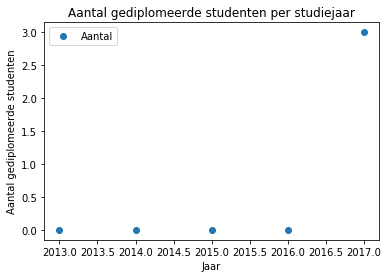

In [53]:
# Plotten van de beschikbare waardes vanuit het dataframe
dataset.plot(x='Jaar', y='Aantal', style='o')  
plt.title('Aantal gediplomeerde studenten per studiejaar')
plt.xlabel('Jaar')
plt.ylabel('Aantal gediplomeerde studenten')
plt.show()

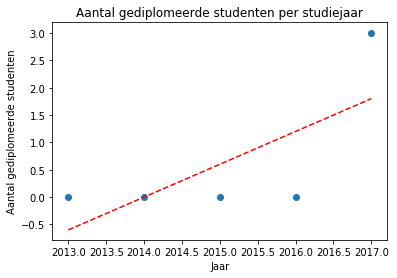

In [54]:
# Scatterplot met trendline
x = dataset['Jaar']
y = dataset['Aantal']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Aantal gediplomeerde studenten per studiejaar')
plt.xlabel('Jaar')
plt.ylabel('Aantal gediplomeerde studenten')
plt.show()

# 4.3 Voorspelling a.d.h.v. beschikbare gegevens (BK/SdJ)

# 4.3.1  OLS (BK/SdJ)
 
Ordinary Least Square (OLS) wordt ook wel Linear Regression (lineaire regressie) genoemd.


In [55]:
# Parameters
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Inlezen data
data = dataset
print(data.shape)
data.head()

(5, 3)


,KWALIFICATIE NAAM,Jaar,Aantal
0,(Junior) accountmanager,2013,0
1,(Junior) accountmanager,2014,0
2,(Junior) accountmanager,2015,0
3,(Junior) accountmanager,2016,0
4,(Junior) accountmanager,2017,3


In [56]:
# X en Y
X = data['Jaar'].values
Y = data['Aantal'].values

In [57]:
# Mean X en Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Totaal aantal values
m = len(X)

# Formule gebruiken om b1 en b2 te berekenen.
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients, b1 = richtingscoefficient (RC)
print(b1, b0)

0.6 -1208.4


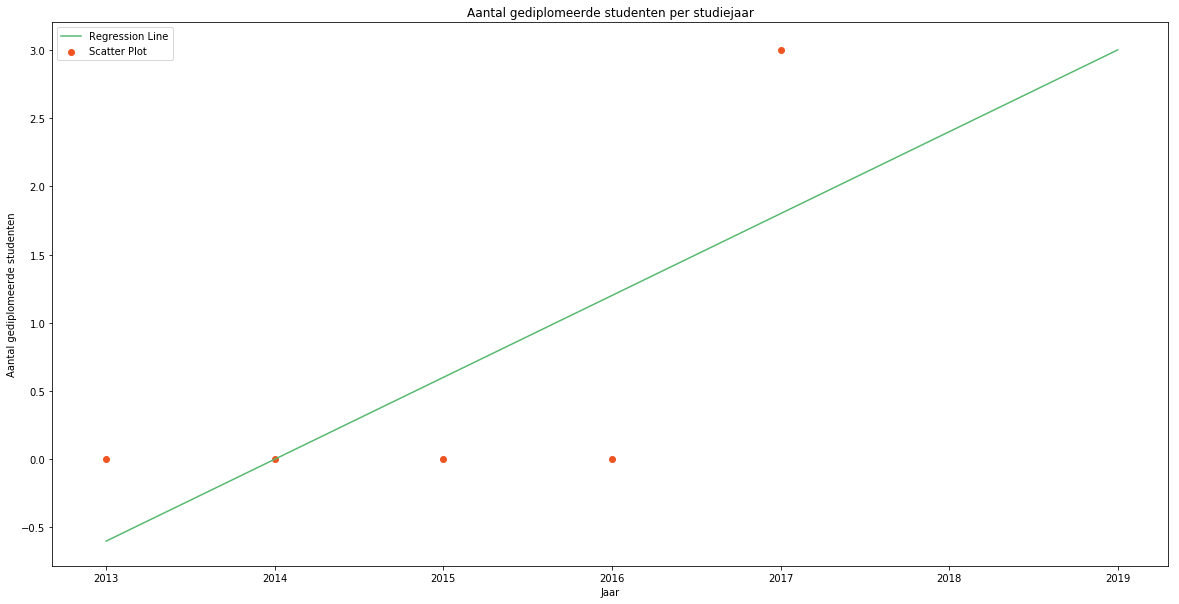

In [58]:
# Plotten values en regressielijn

max_x = np.max(X) + 2
min_x = np.min(X)

# Berekenen line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Plotting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Plotting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.title('Aantal gediplomeerde studenten per studiejaar')
plt.xlabel('Jaar')
plt.ylabel('Aantal gediplomeerde studenten')
plt.legend()
plt.show()

# 4.3.2 SKLEARN - Lineaire regressie (BK/SdJ)

In [59]:
# Uitzoeken hoe goed het model is.
# Gebruik maken van Root Mean Squared Error (RMSE) en Coefficient of Determination(\(R^2\) Score).

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Berekenen RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

# Achterhalen van de richtingscoefficient (RC)
print('RC:', reg.coef_)

# RMSE - Root Mean Squared Error
print('RMSE:', np.sqrt(mse))

# R2
print('R2:', r2_score)

RC: [0.6]
RMSE: 0.8485281374238249
R2: 0.5000000000000377


In [60]:
# Lineaire voorspelling voor een opgegeven jaar

# voorspelling 2018
Voorspelling2018 = reg.predict(2018)
print("Verwacht aantal leeringen in 2018:", Voorspelling2018)

# voorspelling 2019
Voorspelling2019 = reg.predict(2019)
print("Verwacht aantal leeringen in 2019:", Voorspelling2019)

Verwacht aantal leeringen in 2018: [2.4]
Verwacht aantal leeringen in 2019: [3.]


# 4.3.3 Definiëren functies (BK/SdJ)

In [61]:
# Samengevoegd benodigde berekeningen voor: voorspelling 2018, 2019, root square (r2) en richtingscoefficient (rc).

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# For now we use static input, replace this with dynamic values later
xValues = np.array([2013, 2014, 2015, 2016, 2017])
yValues = np.array([205, 1011, 2644, 4191, 5064])

# Reshape X values 
xReshaped = xValues.reshape((len(xValues), 1))

# Creating Model
regModel = LinearRegression()

# Fitting training data
regFit = regModel.fit(xReshaped, yValues)

# Get R2 score
r2_score = regFit.score(xReshaped, yValues)

# Get RC score
rc_score = reg.coef_

# Predictions
pred2018 = regFit.predict(2018)
pred2019 = regFit.predict(2019)

# Print results
print("2018:", pred2018)
print("2019:", pred2019)
print('R2:', r2_score)
print('RC:', reg.coef_)

2018: [6492.4]
2019: [7782.2]
R2: 0.9865399926726358
RC: [0.6]


In [62]:
# Definiëren functies die later aangeroepen kunnen worden

def fitModel(xValues, yValues):
    # Reshape X values 
    xReshaped = xValues.reshape((len(xValues), 1))

    # Creating Model
    regModel = LinearRegression()

    # Fitting training data
    return regModel.fit(xReshaped, yValues)

def getCoef(fitModel):
    return fitModel.coef_

def getR2(xReshaped, yValues):
    # Reshape X values 
    xReshaped = xValues.reshape((len(xValues), 1))
     # Creating Model
    regModel = LinearRegression()
    # Create empty container
    r2Values = []
    columnCount = len(yValues)
    rowCount = len(yValues[0])
    
    for x in range(0,rowCount):
        rowValues = []
        for i in range(0,columnCount):
            rowValues.append(yValues[i][x])
        
        regFit = regModel.fit(xReshaped, rowValues)
        score = regFit.score(xReshaped, rowValues)
        r2Values.append(score)
    
    return r2Values

def getPrediction(fitModel, year):
    return fitModel.predict(year)[0]

In [63]:
# Definiëren functie om het dataframe per gebied te creëren

def calculate(dataset):
    years = np.array([2013, 2014, 2015, 2016, 2017])
    columns = np.array([dataset[2013], dataset[2014], dataset[2015], dataset[2016], dataset[2017]])

    model = fitModel(years, columns)

    # Add predictions
    dataset['2018'] = getPrediction(model, 2018).astype(int)
    dataset['2019'] = getPrediction(model, 2019).astype(int)
    dataset['R2'] = getR2(years, columns)
    dataset['RC'] = getCoef(model)
    return dataset
    
#Pivot the table orientation
pivotTableLandelijk = datasetLandelijk.pivot(index='KWALIFICATIE NAAM', columns='Jaar', values='Aantal')
pivotTableZwolle = datasetZwolle.pivot(index='KWALIFICATIE NAAM', columns='Jaar', values='Aantal')
pivotTableFlevoland = datasetFlevoland.pivot(index='KWALIFICATIE NAAM', columns='Jaar', values='Aantal')

# 4.4 Voorspellend dataframe per gebied (BK/SdJ)

Output voor de drie gebieden (landelijk, Zwolle en Flevoland), aangevuld met voorspelling aan gediplomeerden per kwalificatienaam, root square (R2) en richtingscoefficient (RC).

Hoe dichter R2 bij de 1.0 zit, hoe betrouwbaarder de voorspelling is.
RC laat de toe- of afname zien van het aantal gediplomeerden per studiejaar.

# 4.4.1 Landelijk (BK/SdJ)

In [64]:
# Calculate landelijk
landelijk = calculate(pivotTableLandelijk)

# Print landelijk
landelijk.head()

Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
KWALIFICATIE NAAM,,,,,,,,,
(Junior) accountmanager,0,0,0,0,3,2,2,0.500000,0.6
AV-productie,17,0,0,0,0,-6,-10,0.500000,-3.4
AV-productie (Beeldtechnicus),16,10,3,1,0,-6,-10,0.903763,-4.1
AV-productie (Cameraman),129,144,143,17,1,-28,-66,0.717488,-38.3
AV-productie (Fotograaf),196,172,199,164,192,179,178,0.026251,-1.6


# 4.4.2 Zwolle (BK/SdJ)

In [65]:
# Calculate Zwolle
zwolle = calculate(pivotTableZwolle)

# Print Zwolle
zwolle.head()

Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
KWALIFICATIE NAAM,,,,,,,,,
AV-productie (Beeldtechnicus),0,0,1,0,0,0,0,0.000000,-6.112698e-18
AV-productie (Cameraman),13,13,19,5,0,0,-3,0.516071,-3.400000e+00
AV-productie (Fotograaf),31,40,33,27,22,21,18,0.530353,-3.100000e+00
AV-productie (Geluidstechnicus),2,0,0,0,0,0,-1,0.500000,-4.000000e-01
AV-productie (Video-editor),3,9,5,0,1,0,-1,0.330078,-1.300000e+00


# 4.4.3 Flevoland (BK/SdJ)

In [66]:
# Calculate Flevoland
flevoland = calculate(pivotTableFlevoland)

# Print Flevoland
flevoland.head()

Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
KWALIFICATIE NAAM,,,,,,,,,
AV-productie (Beeldtechnicus),3,1,0,0,0,-1,-2,0.720588,-0.7
AV-productie (Cameraman),22,14,15,2,0,-6,-11,0.903226,-5.6
AV-productie (Fotograaf),10,6,7,5,17,12,14,0.179787,1.3
AV-productie (Geluidstechnicus),5,6,3,0,0,-2,-3,0.831169,-1.6
AV-productie (Lichttechnicus),2,2,3,0,0,0,0,0.500000,-0.6


# 4.5 Stat per dataframe (BK/SdJ)

In [67]:
print(landelijk.shape)
landelijk.describe()

(421, 9)


Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,145.090261,147.935867,151.337292,147.954869,161.128266,160.239905,163.479810,0.574323,3.209501
std,369.802645,389.888602,391.340864,406.277398,445.724720,509.414699,575.814696,0.285199,91.037974
min,0.000000,0.000000,0.000000,0.000000,0.000000,-896.000000,-1704.000000,0.000000,-807.600000
25%,4.000000,1.000000,0.000000,0.000000,0.000000,-4.000000,-6.000000,0.472416,-4.400000
50%,20.000000,14.000000,9.000000,7.000000,5.000000,4.000000,4.000000,0.615300,-0.400000
75%,91.000000,101.000000,102.000000,81.000000,100.000000,101.000000,108.000000,0.802422,5.400000
max,3205.000000,3096.000000,2660.000000,4191.000000,5064.000000,6492.000000,7782.000000,0.995856,1289.800000


In [68]:
print(zwolle.shape)
zwolle.describe()

(324, 9)


Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,28.654321,28.663580,29.200617,28.033951,30.873457,30.098765,30.537037,0.475527,0.380864
std,71.216264,69.494779,73.396543,76.362640,83.013592,96.884132,110.428388,0.289385,18.057920
min,0.000000,0.000000,0.000000,0.000000,0.000000,-218.000000,-368.000000,0.000000,-150.100000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.165069,-1.025000
50%,4.000000,2.500000,2.000000,2.000000,1.500000,1.000000,1.000000,0.500000,-0.200000
75%,19.250000,19.250000,21.000000,16.000000,20.250000,20.250000,20.250000,0.712256,1.200000
max,553.000000,496.000000,594.000000,804.000000,935.000000,1212.000000,1439.000000,1.000000,227.200000


In [69]:
print(flevoland.shape)
flevoland.describe()

(303, 9)


Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,3.030000e+02
mean,22.155116,23.207921,21.636964,21.884488,22.511551,21.920792,21.927393,0.469890,-6.105611e-02
std,52.642984,56.296104,51.130014,51.448842,52.705659,57.421415,62.569231,0.293065,9.599231e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,-104.000000,-176.000000,0.000000,-7.210000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173945,-7.000000e-01
50%,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.500000,-1.643100e-17
75%,15.500000,16.000000,14.000000,14.000000,16.500000,14.000000,16.000000,0.723432,1.000000e+00
max,354.000000,421.000000,318.000000,313.000000,350.000000,449.000000,529.000000,0.990677,7.990000e+01


# 5 Top 10 (BK/SdJ)

In dit onderdeel wordt per gebied (landelijk, Zwolle en Flevoland) een sortering (top 10) en filtering toegepast.
Per gebied kan het filter zelf aangepast worden.

1. Er wordt gekeken naar de meest gediplomeerden in het jaar 2017
2. Er wordt gekeken naar de meest verwachte gediplomeerden in het jaar 2019
3. Er wordt gekeken naar de kwalificatienaam met verhoudingsgewijs de sterkste groe.

# 5.1 Sortering landelijk (BK/SdJ)

In [70]:
# Toepassen van filtering.

# Percentage nauwkeurigheid voorspelling (85% = 0.85)
filter_r2 = 0.80

# Groei aantal gediplomeerde studenten per jaar
filter_rc = 0

# 5.1.1 Meest gediplomeerden 2017 (BK/SdJ)

In [72]:
# Kwalificatienaam meest gediplomeerden landelijk op basis van bekende gegevens in het jaar 2017.

landelijk_sort = landelijk.groupby(['KWALIFICATIE NAAM']).sum()[[2013,2014,2015,2016,2017,'2018','2019','R2','RC']]
landelijk_filter_r2 = landelijk_sort[landelijk_sort['R2'] > filter_r2]
landelijk_filter_rc = landelijk_filter_r2[landelijk_filter_r2['RC'] > filter_rc]
landelijk_sort2017 = landelijk_filter_rc.sort_values(by=2017, ascending=False)
landelijk_sort2017.head(n=10)

Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
KWALIFICATIE NAAM,,,,,,,,,
Mbo-Verpleegkundige,205,1011,2644,4191,5064,6492,7782,0.986540,1289.8
Maatschappelijke Zorg (Persoonlijk begeleider specifieke doelgroepen),1418,1636,2078,2068,2412,2648,2890,0.942205,242.0
Middenkader engineering (Technicus),1841,1929,1933,2018,2035,2094,2142,0.930482,47.7
ICT- en mediabeheer (ICT-beheerder),327,502,989,1312,1830,2136,2518,0.979292,381.6
Ondernemer horeca/bakkerij (Manager/ondernemer horeca),1331,1377,1395,1554,1708,1752,1845,0.891271,93.1
Mediavormgever (Grafische vormgeving),1157,1268,1290,1347,1459,1509,1577,0.952508,68.3
Applicatie- en mediaontwikkeling (Applicatieontwikkelaar),93,219,604,897,1384,1617,1943,0.968497,326.0
Juridisch medewerker zakelijke dienstverlening,1026,1164,1226,1227,1316,1384,1449,0.896915,64.3
Leisure & hospitality (Leisure & hospitality executive),521,763,722,786,1050,1092,1200,0.817192,108.1


# 5.1.2 Meest gediplomeerden 2019 (BK/SdJ)

In [73]:
# Meest verwachte gediplomeerden landelijk op basis van bekende gegevens in het jaar 2019.

landelijk_sort = landelijk.groupby(['KWALIFICATIE NAAM']).sum()[[2013,2014,2015,2016,2017,'2018','2019','R2','RC']]
landelijk_filter_r2 = landelijk_sort[landelijk_sort['R2'] > filter_r2]
landelijk_filter_rc = landelijk_filter_r2[landelijk_filter_r2['RC'] > filter_rc]
landelijk_sort2019 = landelijk_filter_rc.sort_values(by='2019', ascending=False)
landelijk_sort2019.head(n=10)

Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
KWALIFICATIE NAAM,,,,,,,,,
Mbo-Verpleegkundige,205,1011,2644,4191,5064,6492,7782,0.986540,1289.8
Maatschappelijke Zorg (Persoonlijk begeleider specifieke doelgroepen),1418,1636,2078,2068,2412,2648,2890,0.942205,242.0
ICT- en mediabeheer (ICT-beheerder),327,502,989,1312,1830,2136,2518,0.979292,381.6
Middenkader engineering (Technicus),1841,1929,1933,2018,2035,2094,2142,0.930482,47.7
Applicatie- en mediaontwikkeling (Applicatieontwikkelaar),93,219,604,897,1384,1617,1943,0.968497,326.0
Ondernemer horeca/bakkerij (Manager/ondernemer horeca),1331,1377,1395,1554,1708,1752,1845,0.891271,93.1
Mediavormgever (Grafische vormgeving),1157,1268,1290,1347,1459,1509,1577,0.952508,68.3
Sport en bewegen (Sport- en bewegingsco?rdinator/ Trainer/coach),79,197,440,897,1020,1301,1559,0.956322,258.2
Juridisch medewerker zakelijke dienstverlening,1026,1164,1226,1227,1316,1384,1449,0.896915,64.3


# 5.1.3 Grootste toename gediplomeerden landelijk per studiejaar (BK/SdJ)

In [74]:
# Meest verwachte groei gediplomeerden in wervingsgebied Zwolle op basis van de richtingscoëfficient.

landelijk_sort = landelijk.groupby(['KWALIFICATIE NAAM']).sum()[[2013,2014,2015,2016,2017,'2018','2019','R2','RC']]
landelijk_filter_r2 = landelijk_sort[landelijk_sort['R2'] > filter_r2]
landelijk_sortrc = landelijk_filter_r2.sort_values(by='RC', ascending=False)
landelijk_sortrc.head(n=10)

Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
KWALIFICATIE NAAM,,,,,,,,,
Mbo-Verpleegkundige,205,1011,2644,4191,5064,6492,7782,0.986540,1289.8
ICT- en mediabeheer (ICT-beheerder),327,502,989,1312,1830,2136,2518,0.979292,381.6
Applicatie- en mediaontwikkeling (Applicatieontwikkelaar),93,219,604,897,1384,1617,1943,0.968497,326.0
Sport en bewegen (Sport- en bewegingsco?rdinator/ Trainer/coach),79,197,440,897,1020,1301,1559,0.956322,258.2
Maatschappelijke Zorg (Persoonlijk begeleider specifieke doelgroepen),1418,1636,2078,2068,2412,2648,2890,0.942205,242.0
Recreatiedieren (Ondernemer/manager recreatiedieren),88,185,501,462,867,971,1154,0.901337,183.5
Sport en bewegen (Sport- en bewegingsco?rdinator/Bewegingsagoog),94,250,524,702,718,967,1137,0.940598,170.0
Allround schoonheidsspecialist,244,555,745,834,953,1175,1345,0.937319,169.7
Facilitair leidinggevende,6,31,445,576,557,817,981,0.849277,164.7


# 5.2 Sortering wervingsgebied Zwolle (BK/SdJ)

In [75]:
# Toepassen van filtering.

# Percentage nauwkeurigheid voorspelling (85% = 0.85)
filter_r2 = 0.80

# Groei aantal gediplomeerde studenten per jaar
filter_rc = 0

# 5.2.1 Meest gediplomeerden 2017 (BK/SdJ)

In [76]:
# Kwalificatienaam meest gediplomeerden in wervingsgebied Zwolle op basis van bekende gegevens in het jaar 2017.

zwolle_sort = zwolle.groupby(['KWALIFICATIE NAAM']).sum()[[2013,2014,2015,2016,2017,'2018','2019','R2','RC']]
zwolle_filter_r2 = zwolle_sort[zwolle_sort['R2'] > filter_r2]
zwolle_filter_rc = zwolle_filter_r2[zwolle_filter_r2['RC'] > filter_rc]
zwolle_sort2017 = zwolle_filter_rc.sort_values(by=2017, ascending=False)
zwolle_sort2017.head(n=10)

Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
KWALIFICATIE NAAM,,,,,,,,,
Mbo-Verpleegkundige,81,240,594,804,935,1212,1439,0.975994,227.2
Maatschappelijke Zorg (Persoonlijk begeleider specifieke doelgroepen),261,298,414,363,454,493,538,0.801233,45.1
Applicatie- en mediaontwikkeling (Applicatieontwikkelaar),10,37,82,161,221,266,320,0.970089,54.6
ICT- en mediabeheer (ICT-beheerder),44,70,118,226,210,280,328,0.892219,48.8
Recreatiedieren (Ondernemer/manager recreatiedieren),4,46,80,74,175,186,223,0.860746,37.0
Productiedieren (Melkveehouder),8,31,89,72,148,165,198,0.872253,32.1
Sport en bewegen (Sport- en bewegingsco?rdinator/ Trainer/coach),2,11,58,102,127,162,196,0.967235,34.1
Sport en bewegen (Sport- en bewegingsco?rdinator/BOS-medewerker),1,11,81,83,112,145,175,0.907255,29.4
Facilitair leidinggevende,0,5,76,95,110,150,181,0.909452,31.0


# 5.2.2 Meest gediplomeerden 2019 (BK/SdJ)

In [77]:
# Meest verwachte gediplomeerden in wervingsgebied Zwolle op basis van bekende gegevens in het jaar 2019.

zwolle_sort = zwolle.groupby(['KWALIFICATIE NAAM']).sum()[[2013,2014,2015,2016,2017,'2018','2019','R2','RC']]
zwolle_filter_r2 = zwolle_sort[zwolle_sort['R2'] > filter_r2]
zwolle_filter_rc = zwolle_filter_r2[zwolle_filter_r2['RC'] > filter_rc]
zwolle_sort2019 = zwolle_filter_rc.sort_values(by='2019', ascending=False)
zwolle_sort2019.head(n=10)

Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
KWALIFICATIE NAAM,,,,,,,,,
Mbo-Verpleegkundige,81,240,594,804,935,1212,1439,0.975994,227.2
Maatschappelijke Zorg (Persoonlijk begeleider specifieke doelgroepen),261,298,414,363,454,493,538,0.801233,45.1
ICT- en mediabeheer (ICT-beheerder),44,70,118,226,210,280,328,0.892219,48.8
Applicatie- en mediaontwikkeling (Applicatieontwikkelaar),10,37,82,161,221,266,320,0.970089,54.6
Recreatiedieren (Ondernemer/manager recreatiedieren),4,46,80,74,175,186,223,0.860746,37.0
Productiedieren (Melkveehouder),8,31,89,72,148,165,198,0.872253,32.1
Sport en bewegen (Sport- en bewegingsco?rdinator/ Trainer/coach),2,11,58,102,127,162,196,0.967235,34.1
Facilitair leidinggevende,0,5,76,95,110,150,181,0.909452,31.0
Sport en bewegen (Sport- en bewegingsco?rdinator/BOS-medewerker),1,11,81,83,112,145,175,0.907255,29.4


# 5.2.3 Grootste toename gediplomeerden per studiejaar (BK/SdJ)

In [78]:
# Meest verwachte groei gediplomeerden in wervingsgebied Zwolle op basis van de richtingscoëfficient.

zwolle_sort = zwolle.groupby(['KWALIFICATIE NAAM']).sum()[[2013,2014,2015,2016,2017,'2018','2019','R2','RC']]
zwolle_filter_r2 = zwolle_sort[zwolle_sort['R2'] > filter_r2]
zwolle_sortrc = zwolle_filter_r2.sort_values(by='RC', ascending=False)
zwolle_sortrc.head(n=10)

Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
KWALIFICATIE NAAM,,,,,,,,,
Mbo-Verpleegkundige,81,240,594,804,935,1212,1439,0.975994,227.2
Applicatie- en mediaontwikkeling (Applicatieontwikkelaar),10,37,82,161,221,266,320,0.970089,54.6
ICT- en mediabeheer (ICT-beheerder),44,70,118,226,210,280,328,0.892219,48.8
Maatschappelijke Zorg (Persoonlijk begeleider specifieke doelgroepen),261,298,414,363,454,493,538,0.801233,45.1
Recreatiedieren (Ondernemer/manager recreatiedieren),4,46,80,74,175,186,223,0.860746,37.0
Sport en bewegen (Sport- en bewegingsco?rdinator/ Trainer/coach),2,11,58,102,127,162,196,0.967235,34.1
Productiedieren (Melkveehouder),8,31,89,72,148,165,198,0.872253,32.1
Facilitair leidinggevende,0,5,76,95,110,150,181,0.909452,31.0
Sport en bewegen (Sport- en bewegingsco?rdinator/BOS-medewerker),1,11,81,83,112,145,175,0.907255,29.4


# 5.3 Sortering wervingsgebied Flevoland (BK/SdJ)

In [79]:
# Toepassen van filtering.

# Percentage nauwkeurigheid voorspelling (85% = 0.85)
filter_r2 = 0.80

# Groei aantal gediplomeerde studenten per jaar
filter_rc = 0

# 5.3.1 Meest gediplomeerden 2017 (BK/SdJ)

In [80]:
# Kwalificatienaam meest gediplomeerden in wervingsgebied Flevoland op basis van bekende gegevens in het jaar 2017.

flevoland_sort = flevoland.groupby(['KWALIFICATIE NAAM']).sum()[[2013,2014,2015,2016,2017,'2018','2019','R2','RC']]
flevoland_filter_r2 = flevoland_sort[flevoland_sort['R2'] > filter_r2]
flevoland_filter_rc = flevoland_filter_r2[flevoland_filter_r2['RC'] > filter_rc]
flevoland_sort2017 = flevoland_filter_rc.sort_values(by=2017, ascending=False)
flevoland_sort2017.head(n=10)

Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
KWALIFICATIE NAAM,,,,,,,,,
Mbo-Verpleegkundige,36,133,227,304,350,449,529,0.983214,79.9
Ondernemer horeca/bakkerij (Manager/ondernemer horeca),198,194,204,234,252,260,275,0.851898,14.8
ICT- en mediabeheer (ICT-beheerder),56,106,128,172,229,261,303,0.982042,41.2
Maatschappelijke Zorg (Persoonlijk begeleider specifieke doelgroepen),118,157,158,164,199,209,226,0.862662,16.9
Applicatie- en mediaontwikkeling (Applicatieontwikkelaar),23,41,122,104,151,183,215,0.861301,31.9
Secretariele beroepen (Directiesecretaresse/managementassistent),22,77,121,123,138,179,207,0.863046,27.8
Recreatiedieren (Ondernemer/manager recreatiedieren),2,15,57,45,104,114,138,0.859160,23.4
Frontofficemedewerker (Frontofficemanager),57,65,87,92,95,110,120,0.907683,10.3
Mediavormgever (Animatie/audiovisuele vormgeving),51,54,61,74,85,91,100,0.951351,8.8


# 5.3.2 Meest gediplomeerden 2019 (BK/SdJ)

In [81]:
# Meest verwachte gediplomeerden in wervingsgebied Flevoland op basis van bekende gegevens in het jaar 2019.

flevoland_sort = flevoland.groupby(['KWALIFICATIE NAAM']).sum()[[2013,2014,2015,2016,2017,'2018','2019','R2','RC']]
flevoland_filter_r2 = flevoland_sort[flevoland_sort['R2'] > filter_r2]
flevoland_filter_rc = flevoland_filter_r2[flevoland_filter_r2['RC'] > filter_rc]
flevoland_sort2019 = flevoland_filter_rc.sort_values(by=2017, ascending=False)
flevoland_sort2019.head(n=10)

Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
KWALIFICATIE NAAM,,,,,,,,,
Mbo-Verpleegkundige,36,133,227,304,350,449,529,0.983214,79.9
Ondernemer horeca/bakkerij (Manager/ondernemer horeca),198,194,204,234,252,260,275,0.851898,14.8
ICT- en mediabeheer (ICT-beheerder),56,106,128,172,229,261,303,0.982042,41.2
Maatschappelijke Zorg (Persoonlijk begeleider specifieke doelgroepen),118,157,158,164,199,209,226,0.862662,16.9
Applicatie- en mediaontwikkeling (Applicatieontwikkelaar),23,41,122,104,151,183,215,0.861301,31.9
Secretariele beroepen (Directiesecretaresse/managementassistent),22,77,121,123,138,179,207,0.863046,27.8
Recreatiedieren (Ondernemer/manager recreatiedieren),2,15,57,45,104,114,138,0.859160,23.4
Frontofficemedewerker (Frontofficemanager),57,65,87,92,95,110,120,0.907683,10.3
Mediavormgever (Animatie/audiovisuele vormgeving),51,54,61,74,85,91,100,0.951351,8.8


# 5.3.3 Grootste toename gediplomeerden per studiejaar (BK/SdJ)

In [82]:
# Meest verwachte groei gediplomeerden in wervingsgebied Flevoland op basis van de richtingscoëfficient.

flevoland_sort = flevoland.groupby(['KWALIFICATIE NAAM']).sum()[[2013,2014,2015,2016,2017,'2018','2019','R2','RC']]
flevoland_filter_r2 = flevoland_sort[flevoland_sort['R2'] > filter_r2]
flevoland_sortrc = flevoland_filter_r2.sort_values(by='RC', ascending=False)
flevoland_sortrc.head(n=10)

Jaar,2013,2014,2015,2016,2017,2018,2019,R2,RC
KWALIFICATIE NAAM,,,,,,,,,
Mbo-Verpleegkundige,36,133,227,304,350,449,529,0.983214,79.9
ICT- en mediabeheer (ICT-beheerder),56,106,128,172,229,261,303,0.982042,41.2
Applicatie- en mediaontwikkeling (Applicatieontwikkelaar),23,41,122,104,151,183,215,0.861301,31.9
Secretariele beroepen (Directiesecretaresse/managementassistent),22,77,121,123,138,179,207,0.863046,27.8
Recreatiedieren (Ondernemer/manager recreatiedieren),2,15,57,45,104,114,138,0.859160,23.4
Sport en bewegen (Sport- en bewegingsco?rdinator/ Trainer/coach),9,18,36,65,83,100,120,0.972307,19.5
Maatschappelijke Zorg (Persoonlijk begeleider specifieke doelgroepen),118,157,158,164,199,209,226,0.862662,16.9
Facilitair leidinggevende,0,7,32,59,56,80,96,0.912719,16.4
Sport en bewegen (Sport- en bewegingsco?rdinator/Bewegingsagoog),19,43,66,85,77,105,121,0.860828,15.8
